In [1]:

import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [2]:
# read data as pandas data frame
data = pd.read_csv("eda_2.csv")
data = data.drop(['Unnamed: 32','id'],axis = 1)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [41]:
data[data["diagnosis"] == "M"]['radius_mean'].sort_values()

41     10.95
379    11.08
3      11.42
297    11.76
146    11.80
31     11.84
193    12.34
5      12.45
9      12.46
64     12.68
135    12.77
229    12.83
8      13.00
105    13.11
47     13.17
44     13.17
43     13.28
512    13.40
171    13.43
40     13.44
39     13.48
126    13.61
100    13.61
7      13.71
14     13.73
196    13.77
73     13.80
203    13.81
501    13.82
215    13.86
       ...  
1      20.57
210    20.58
499    20.59
567    20.60
373    20.64
265    20.73
563    20.92
250    20.94
181    21.09
449    21.10
23     21.16
372    21.37
564    21.56
393    21.61
368    21.71
272    21.75
369    22.01
108    22.27
503    23.09
236    23.21
164    23.27
202    23.29
339    23.51
122    24.25
521    24.63
82     25.22
352    25.73
180    27.22
461    27.42
212    28.11
Name: radius_mean, Length: 212, dtype: float64

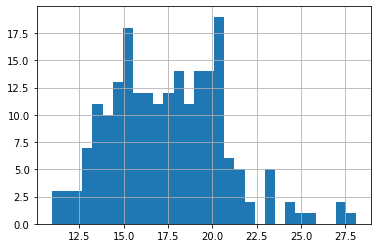

In [34]:
data[data["diagnosis"] == "M"]['radius_mean'].hist(bins=30)

In [56]:
data[data["diagnosis"] == "M"]['radius_mean'].sort_values()

41     10.95
379    11.08
3      11.42
297    11.76
146    11.80
31     11.84
193    12.34
5      12.45
9      12.46
64     12.68
135    12.77
229    12.83
8      13.00
105    13.11
47     13.17
44     13.17
43     13.28
512    13.40
171    13.43
40     13.44
39     13.48
126    13.61
100    13.61
7      13.71
14     13.73
196    13.77
73     13.80
203    13.81
501    13.82
215    13.86
       ...  
1      20.57
210    20.58
499    20.59
567    20.60
373    20.64
265    20.73
563    20.92
250    20.94
181    21.09
449    21.10
23     21.16
372    21.37
564    21.56
393    21.61
368    21.71
272    21.75
369    22.01
108    22.27
503    23.09
236    23.21
164    23.27
202    23.29
339    23.51
122    24.25
521    24.63
82     25.22
352    25.73
180    27.22
461    27.42
212    28.11
Name: radius_mean, Length: 212, dtype: float64

In [ ]:
#frequency
#Frequency = number of times each value appears
# Example: [1,1,1,1,2,2,2]. Frequency of 1 is four and frequency of 2 is three.

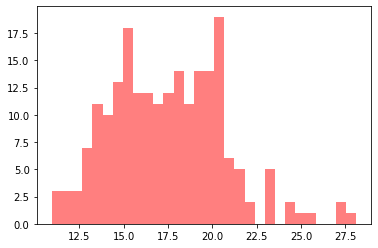

In [65]:
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
#M için radius_mean bulduk

In [61]:
m

(array([ 3.,  3.,  3.,  7., 11., 10., 13., 18., 12., 12., 11., 12., 14.,
        11., 14., 14., 19.,  6.,  5.,  2.,  0.,  5.,  0.,  2.,  1.,  1.,
         0.,  0.,  2.,  1.]),
 array([10.95 , 11.522, 12.094, 12.666, 13.238, 13.81 , 14.382, 14.954,
        15.526, 16.098, 16.67 , 17.242, 17.814, 18.386, 18.958, 19.53 ,
        20.102, 20.674, 21.246, 21.818, 22.39 , 22.962, 23.534, 24.106,
        24.678, 25.25 , 25.822, 26.394, 26.966, 27.538, 28.11 ]),
 <a list of 30 Patch objects>)

In [47]:
np.sort(m[0])

array([ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,
        5.,  5.,  6.,  7., 10., 11., 11., 11., 12., 12., 12., 13., 14.,
       14., 14., 18., 19.])

In [51]:
m[0] #sıklık sayısını veriyor (y ekseni)

array([ 3.,  3.,  3.,  7., 11., 10., 13., 18., 12., 12., 11., 12., 14.,
       11., 14., 14., 19.,  6.,  5.,  2.,  0.,  5.,  0.,  2.,  1.,  1.,
        0.,  0.,  2.,  1.])

In [68]:
list(m[0]).index(m[0].max())

16

In [69]:
m[1][16]

20.101999999999997

In [52]:
m[1] #özet değerleri veriyor(x ekseni)

array([10.95 , 11.522, 12.094, 12.666, 13.238, 13.81 , 14.382, 14.954,
       15.526, 16.098, 16.67 , 17.242, 17.814, 18.386, 18.958, 19.53 ,
       20.102, 20.674, 21.246, 21.818, 22.39 , 22.962, 23.534, 24.106,
       24.678, 25.25 , 25.822, 26.394, 26.966, 27.538, 28.11 ])

In [44]:
list(m[0]).index(frequent_malignant_radius_mean)

16

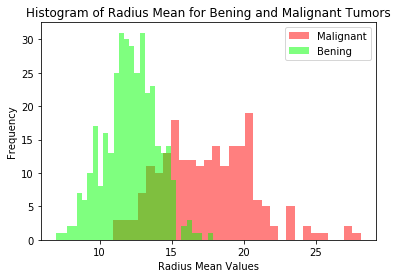

Most frequent malignant radius mean is:  20.101999999999997


In [54]:
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
#M için radius_mean bulduk
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
#B için radius_mean bulduk
#bunların sıklıklarını bulduk. 
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max() #en sık olan yani en çok bulunan değer
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean] #indexi aldık
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

In [73]:
#find outliers

In [74]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]


In [75]:
desc = data_bening.radius_mean.describe()
desc

count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64

In [80]:
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


In [79]:
#aynısını biz yapalım
q1=data_bening.radius_mean.quantile(0.25)
q3=data_bening.radius_mean.quantile(0.75)
iqr = q3-q1
lower=q1-1.5*iqr
upper=3+1.3*iqr


11.08

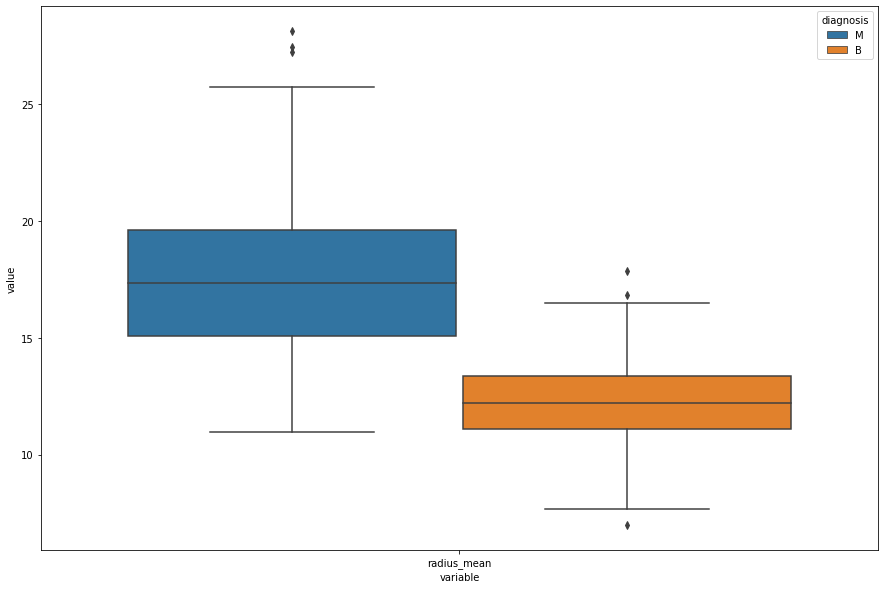

In [84]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

In [85]:
print("mean: ",data_bening.radius_mean.mean())
print("variance: ",data_bening.radius_mean.var())
print("standart deviation (std): ",data_bening.radius_mean.std())
print("describe method: ",data_bening.radius_mean.describe())

mean:  12.14652380952381
variance:  3.170221722043872
standart deviation (std):  1.7805116461410389
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


In [86]:
#CDF

C:\Users\huseyin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


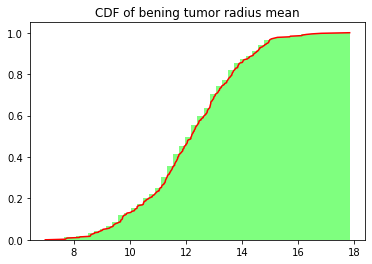

In [87]:
plt.hist(data_bening.radius_mean,bins=50,fc=(0,1,0,0.5),label='Bening',normed = True,cumulative = True)
sorted_data = np.sort(data_bening.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('CDF of bening tumor radius mean')
plt.show()

In [88]:
#effect size

In [89]:
mean_diff = data_malignant.radius_mean.mean() - data_bening.radius_mean.mean()
var_bening = data_bening.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()
var_pooled = (len(data_bening)*var_bening +len(data_malignant)*var_malignant ) / float(len(data_bening)+ len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  2.2048585165041428


<Figure size 1080x720 with 0 Axes>

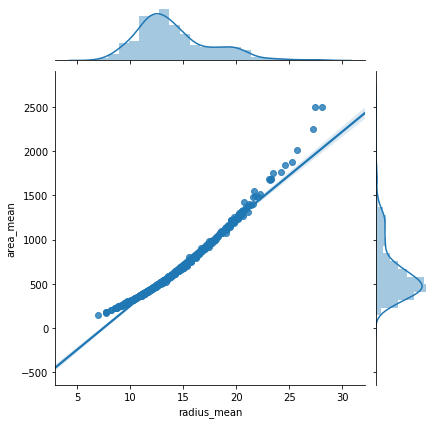

In [91]:
#data relationship
plt.figure(figsize = (15,10))
sns.jointplot(data.radius_mean,data.area_mean,kind="regg")
plt.show()

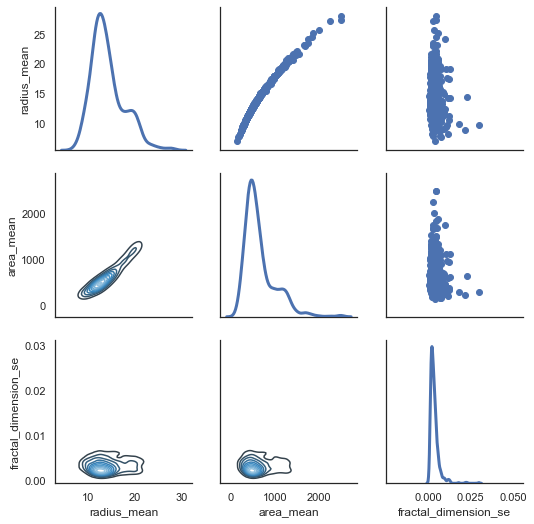

In [93]:
# Also we can look relationship between more than 2 distribution
sns.set(style = "white")
df = data.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

In [94]:
#CORRELATION

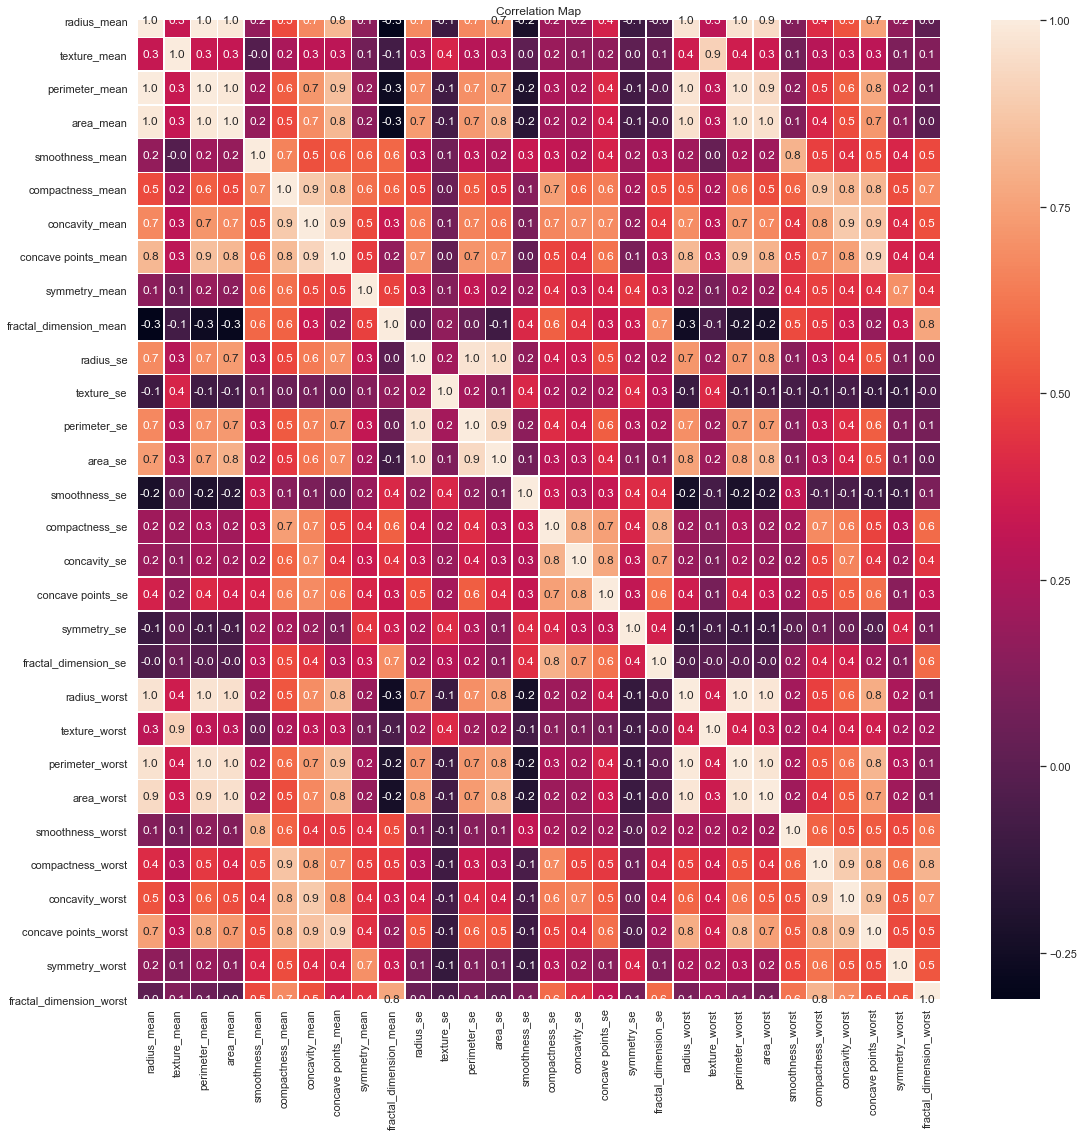

In [96]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [97]:
#covariance
np.cov(data.radius_mean,data.area_mean)
print("Covariance between radius mean and area mean: ",data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ",data.radius_mean.cov(data.fractal_dimension_se))

Covariance between radius mean and area mean:  1224.4834093464565
Covariance between radius mean and fractal dimension se:  -0.0003976248576440626


In [98]:
#pearson corr
p1 = data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.9873571700566128


In [100]:
#hyp. testing
from scipy import stats
statistic, p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print('p-value: ',p_value)

p-value:  1.5253492492559045e-184


mean:  110.04063026171498
standart deviation:  20.024126506837714


C:\Users\huseyin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


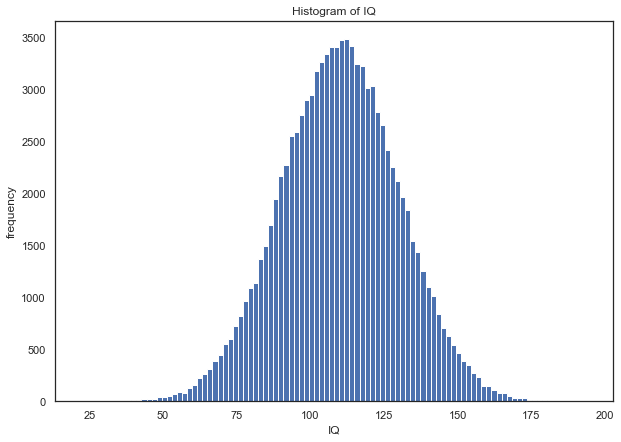

In [103]:
# parameters of normal distribution
mu, sigma = 110, 20  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100, normed=False)
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()

In [105]:
z = (x - mean)/std 
z1 = (80-110)/20 = -1.5
z2 = (140-110)/20 = 1.5
#Distance between mean and 80 is 1.5std and distance between mean and 140 is 1.5std.
#If you look at z table, you will see that 1.5std correspond to 0.4332

SyntaxError: can't assign to operator (<ipython-input-105-b7aa8cd2a0eb>, line 2)